## Section 1. Business Understanding

For this project on writing a data science blog post, I have chosen a dataset on Sleep Apnea from VA Medical Center - Detroit. This dataset has Sleep apnea Architecture and metrics along with other info about the patients. To help better understand the data I have the following questions. 

Questions
 
* What role does Race play over the Preventable factors and their impacts over Sleep Apnea?
* What affect does Race have in the non-Preventable factors and their impacts over Sleep Apnea?
* Can Sleep Apnea be cured or for that matter even controlled/managed over time? If yes, how?
* How are these factors influencing the severity of the disease and its treatment?


In [1]:
# Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Section 2: Data understanding

##### Access Data

Data is read using the Pandas read_csv() function and stored in df 

In [2]:
df=pd.read_csv("Sleep_Apnea_Data.csv")
df.head(4) # preview dataframe

,Participant Coded,Age(Yrs),Race,Socio-Economic Status,Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A),BMI,Obesity,Education,Type of Meals,Diabetic,...,Hypertension,Lowest Oxygen Desaturation(%) -hypoxic burden/stress,Average Apnea Duration(seconds)- sleep apnea architecture,Arousal Index(Number of Arousals/Hour)- sleep fragmentation,% NREM Sleep-Sleep Quality,Average CPAP use(hours/night) -CPAP compliance/adherance,Apnea Hypopnea Index AHI-After 12 weeks of CPAP Use,Reduction in Snoring-After 12 weeks of CPAP Use,Reduction in Tiredness-After 12 weeks of CPAP Use,Reduction in Daytime Sleepiness-After 12 weeks of CPAP Use
0,AB,44,AA,Middle,Y,29.8,N,UG,P,N,...,Y,81.3,25.4,27.40,0.95,3.42,42.1,1,1,1
1,AL,49,AA,Middle,Y,37.8,Y,UG,F,N,...,Y,81.2,29.2,28.08,0.91,4.30,74.3,1,1,1
2,AM,36,AA,Middle,Y,34.1,Y,UG,F,N,...,Y,77.4,43.7,22.52,0.79,3.44,33.4,1,2,1
3,AO,37,AA,Low,Y,38.6,Y,HS,P,N,...,Y,80.2,24.6,21.08,0.70,3.72,41.5,2,1,1


##### Explore Data

In [3]:
# Let's look at number of columns, column labels, column data types, memory usage, range index, 
# and the number of cells in each column (non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 25 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Participant Coded                                                         208 non-null    object 
 1   Age(Yrs)                                                                  208 non-null    int64  
 2   Race                                                                      208 non-null    object 
 3   Socio-Economic Status                                                     208 non-null    object 
 4   Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A)  208 non-null    object 
 5   BMI                                                                       208 non-null    float64
 6   Obesity                                                           

> A look at the dataframe's schema gives us this info: 
* The dataframe consists of 208 observations and 25 columns.
* The only column that has some Null values is Physical Health Index, which has 208-201=7 records/observations with Null values.
* The column name for % NREM Sleep- Sleep Quality does not seem to be consistent with other column names in the dataframe
* The column names for Column number 4 and columns 16-24 could be revisited to be renamed for better use.
* The file can be optimized for memory by converting columns to more approporiate data types and removing columns that may not provide any value to analysis. 

In [4]:
# Display a sample of the dataframe
df.sample(3)

,Participant Coded,Age(Yrs),Race,Socio-Economic Status,Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A),BMI,Obesity,Education,Type of Meals,Diabetic,...,Hypertension,Lowest Oxygen Desaturation(%) -hypoxic burden/stress,Average Apnea Duration(seconds)- sleep apnea architecture,Arousal Index(Number of Arousals/Hour)- sleep fragmentation,% NREM Sleep-Sleep Quality,Average CPAP use(hours/night) -CPAP compliance/adherance,Apnea Hypopnea Index AHI-After 12 weeks of CPAP Use,Reduction in Snoring-After 12 weeks of CPAP Use,Reduction in Tiredness-After 12 weeks of CPAP Use,Reduction in Daytime Sleepiness-After 12 weeks of CPAP Use
37,LQ,37,AA,Low,N,21.0,N,HS,P,N,...,Y,88.4,17.1,27.14,0.65,3.98,30.0,2,1,1
207,ZW,33,Cauc,Middle,Y,30.0,Y,PG,P,N,...,N,91.7,35.2,11.06,0.84,5.54,18.4,4,3,5
95,YR,33,AA,Low,Y,32.6,Y,HS,P,N,...,Y,81.8,20.6,20.10,0.68,4.45,41.7,1,1,2


> There is Participant Coded,Age,Race,Socio-Economic Status,Presence of HTR2A gene,BMI,Obesity,Education,Type of Meals,Diabetic,Smoking,Exercise Duration,Lifestyle,Physical health Index,Apnea Hypopnea Index,Hypertension,Lowest Oxygen Desaturation,Average Apnea Duration,Arousal Index,Sleep Quality,Average CPAP Use,AHI-Post 12weeks CPAP Use,Reduction in Snoring-Post 12weeks CPAP Use,Reduction in Tiredness-Post 12weeks CPAP Use,Reduction in Daytime Sleepiness-Post 12weeks CPAP Use. All together there are 24 distinct metrics/measures for evaluating the patient.

In [5]:
# Display the values in the Race column to take a close look at the values for classification
df["Race"].head(10)

0    AA
1    AA
2    AA
3    AA
4    AA
5    AA
6    AA
7    AA
8    AA
9    AA
Name: Race, dtype: object

> The Race column appears to have values of only two types AA- African American and CAUC - Caucasion. Lets confirm this further

In [6]:
# Lets check for any duplicates in few of the Object type columns in our DF as listed earlier
df.duplicated(subset=["Race","Obesity","Diabetic","Smoking"],keep = False).sum()

208

> It says 208 duplicates?? This doesnt make much sense. Lets rather check for the distinct values in these columns.

In [7]:
# count the number of values in the category column
df["Race"].value_counts()

AA      104
Cauc    104
Name: Race, dtype: int64

In [8]:
df["Obesity"].value_counts()

Y    120
N     88
Name: Obesity, dtype: int64

In [9]:
df["Diabetic"].value_counts()

N    208
Name: Diabetic, dtype: int64

In [10]:
df["Type of Meals"].value_counts()

P    122
F     86
Name: Type of Meals, dtype: int64

In [11]:
# let's look for count of values in Smoking column
df["Smoking"].value_counts()

N    208
Name: Smoking, dtype: int64

> Race and Obesity columns each have 2 types of values in them, of which Race could be used as a major classification criteria.

So taking a closer look at the observations we can deduce that
* The entire dataset is of participants who are Non-Smokers and also they dont have any type of Diabetes.
* The columns Participant Coded, Diabetic and Smoking can be dropped without any loss of details; they do not provide any contrast value for analysis. 
* The Race column has though only two distinct values , but it has equal distribution of entire dataset into AA and CAUC.
* The columns like Obesity, Presence of OSA Gene, Hypertension could be rather converted to Bool type, since they hold only Y/N values.
* The dataset provides columns that could be used for different classifications or clusters

## Section 3: Prepare Data

##### Cleaning Data

In [12]:
# Let's take another look at number of columns, column labels, column data types, memory usage, 
# range index, and the number of cells in each column (non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 25 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Participant Coded                                                         208 non-null    object 
 1   Age(Yrs)                                                                  208 non-null    int64  
 2   Race                                                                      208 non-null    object 
 3   Socio-Economic Status                                                     208 non-null    object 
 4   Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A)  208 non-null    object 
 5   BMI                                                                       208 non-null    float64
 6   Obesity                                                           

> The dataframe currently uses 40.8+ KB of memory , we can further optimize it for memory by using appropriate data types and dropping columns deemed unnecessary for analysis

In [13]:
# let's look for count of values in Smoking column
df["Smoking"].value_counts()

N    208
Name: Smoking, dtype: int64

In [14]:
df["Diabetic"].value_counts()

N    208
Name: Diabetic, dtype: int64

> The Smoking column has only one value; the "N" Value. Dropping the Smoking column will not cause any loss in details.
> Similar is the case for the Diabetic column, To compensate for removing these columns we can acknowledge in our comments and writeups, mentioning the fact that the Participants coded in this Data set are Non-Smokers and Non-Diabetic.
> We have a numeric index created by pandas for our dataframe, so we can also safely drop Participant Coded column and not loose any details.

In [15]:
# drop the id and currency columns
df=df.drop(columns=["Participant Coded","Smoking","Diabetic"])

In [16]:
# renaming few columns to more readable and presentable format
df=df.rename(columns={"Exercise Duration(Minutes/day)":"Exercise Dur(Mins/day)",
                      "Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A)":
                      "Presence of HTR2A Gene","Physical health Index(SF-36 Questionnaire)":"Phy Hlth Index",
                      "Apnea Hypopnea Index (Severity of OSA)":"AHI",
                      "Average Apnea Duration(seconds)- sleep apnea architecture":"Avg Apnea Dur(Secs)",
                      "Arousal Index(Number of Arousals/Hour)- sleep fragmentation":"Arousal Index",
                      "% NREM Sleep-Sleep Quality":"Percent NREM Sleep",
                      "Average CPAP use(hours/night) -CPAP compliance/adherance":"Avg CPAP Use(hrs/night)",
                     "Apnea Hypopnea Index AHI-After 12 weeks of CPAP Use":"AHI-Post 12wks CPAP Use",
                     "Reduction in Snoring-After 12 weeks of CPAP Use":"Reduced Snoring-Post 12wks CPAP Use",
                     "Reduction in Tiredness-After 12 weeks of CPAP Use":"Reduced Tiredness-Post 12wks CPAP Use",
                     "Reduction in Daytime Sleepiness-After 12 weeks of CPAP Use":
                      "Reduced Daytime Sleepiness-Post 12wks CPAP Use"})
df.head(2)

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest Oxygen Desaturation(%) -hypoxic burden/stress,Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
0,44,AA,Middle,Y,29.8,N,UG,P,56.4,A,...,Y,81.3,25.4,27.40,0.95,3.42,42.1,1,1,1
1,49,AA,Middle,Y,37.8,Y,UG,F,35.0,A,...,Y,81.2,29.2,28.08,0.91,4.30,74.3,1,1,1


> from the dataframe we can see Participant Coded, Diabetic, Smoking columns have been dropped and the Apnea Architecture/metrics related columns have been renamed

In [17]:
# Lets look at few column values
df["Socio-Economic Status"].value_counts()

Middle    104
Low        84
High       20
Name: Socio-Economic Status, dtype: int64

In [18]:
df["Education"].value_counts()

HS    104
UG     84
PG     20
Name: Education, dtype: int64

> As we can see there are just three categories, converting these columns to category datatype may save us memory

In [19]:
# converting Race column's data type to category datatype
df["Race"]=df["Race"].astype("category")

In [20]:
# lets look at the count of values in the Lifestyle column
df["Lifestyle"].value_counts()

S    110
A     98
Name: Lifestyle, dtype: int64

In [21]:
# lets look at the count of values in the Type of Meals column
df["Type of Meals"].value_counts()

P    122
F     86
Name: Type of Meals, dtype: int64

> We can see some single characters in the values of the Lifestyle,Type of meals columns. We need to convert all the values to a more readable format before we can actually make any use of them 

In [22]:
# Replace all 'P' in the 'Type of Meals' column to the value 'Packed' and all 'F' to the value 'Fresh'
df["Type of Meals"] = df["Type of Meals"].replace('P', 'Packed', regex=True)
df["Type of Meals"] = df["Type of Meals"].replace('F', 'Fresh', regex=True)
df["Type of Meals"].value_counts()

Packed    122
Fresh      86
Name: Type of Meals, dtype: int64

In [23]:
# Replace all 'A' in the 'Lifestyle' column to the value 'Active' and all 'S' to the value 'Sedentary'
df["Lifestyle"] = df["Lifestyle"].replace('A', 'Active', regex=True)
df["Lifestyle"] = df["Lifestyle"].replace('S', 'Sedentary', regex=True)
df["Lifestyle"].value_counts()

Sedentary    110
Active        98
Name: Lifestyle, dtype: int64

> We can see that value conversions took place with no errors, which is a sign that all the values in the columns are now updated to be more readable

In [24]:
# lets now rename one more column before we see how the dataframe schema and stats looks now 
df=df.rename(columns={"Lowest Oxygen Desaturation(%) -hypoxic burden/stress":"Lowest O2 Desaturation(%)"})
df.head(2)

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
0,44,AA,Middle,Y,29.8,N,UG,Packed,56.4,Active,...,Y,81.3,25.4,27.40,0.95,3.42,42.1,1,1,1
1,49,AA,Middle,Y,37.8,Y,UG,Fresh,35.0,Active,...,Y,81.2,29.2,28.08,0.91,4.30,74.3,1,1,1


In [25]:
# lets sort the dataframe so that the participants with specific Race are sorted as oldest at the top
# Sort df by Age descending 
sorted_df = df.sort_values(by=["Race","Age(Yrs)"],ascending=[True,False])
sorted_df.head()

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
25,59,AA,Middle,Y,35.4,Y,UG,Fresh,30.0,Active,...,Y,82.9,27.8,23.08,0.83,4.55,72.4,2,1,2
31,59,AA,Low,Y,30.4,Y,HS,Packed,25.3,Sedentary,...,Y,82.9,25.0,31.86,0.66,3.42,30.1,2,1,1
80,59,AA,Low,Y,34.8,Y,HS,Packed,21.9,Sedentary,...,Y,76.1,42.7,32.34,0.90,3.40,82.2,1,1,2
73,57,AA,Low,Y,28.4,N,HS,Packed,21.7,Sedentary,...,Y,87.7,23.3,37.35,0.87,3.26,78.3,2,1,1
61,56,AA,Middle,Y,32.4,Y,UG,Packed,15.2,Sedentary,...,Y,86.9,17.8,25.53,0.94,3.54,35.5,1,1,2


> Good! now we can see that the participants with higher age are on top and also categorized based on their Race

In [26]:
#Update the df with the sorted df
df=sorted_df

In [27]:
# Lets again check to see how the dataframe schema and stats looks like 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 25 to 188
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Age(Yrs)                                        208 non-null    int64   
 1   Race                                            208 non-null    category
 2   Socio-Economic Status                           208 non-null    object  
 3   Presence of HTR2A Gene                          208 non-null    object  
 4   BMI                                             208 non-null    float64 
 5   Obesity                                         208 non-null    object  
 6   Education                                       208 non-null    object  
 7   Type of Meals                                   208 non-null    object  
 8   Exercise Dur(Mins/day)                          208 non-null    float64 
 9   Lifestyle                      

> As we can see the columns now have the right data types and memory usage is reduced from 40.8+ KB to 36.1 KB, Column names have now been updated to more readable format and unnecessary columns have been dropped

In [28]:
#Let's update the data type of few more columns
df["Education"]=df["Education"].astype("object")
df["Socio-Economic Status"]=df["Socio-Economic Status"].astype("object")
df["Lifestyle"] =df["Lifestyle"].astype("object")
df["Type of Meals"] =df["Type of Meals"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 25 to 188
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Age(Yrs)                                        208 non-null    int64   
 1   Race                                            208 non-null    category
 2   Socio-Economic Status                           208 non-null    object  
 3   Presence of HTR2A Gene                          208 non-null    object  
 4   BMI                                             208 non-null    float64 
 5   Obesity                                         208 non-null    object  
 6   Education                                       208 non-null    object  
 7   Type of Meals                                   208 non-null    object  
 8   Exercise Dur(Mins/day)                          208 non-null    float64 
 9   Lifestyle                      

In [29]:
# display a sample of 5 rows
df.sample(5, random_state=8)

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
147,34,Cauc,Low,Y,34.8,Y,HS,Packed,24.8,Sedentary,...,Y,86.8,19.3,15.59,0.95,5.75,13.7,4,4,4
105,34,Cauc,Middle,N,28.8,N,UG,Packed,24.0,Sedentary,...,N,88.8,16.1,14.77,0.95,6.32,20.3,4,4,4
199,38,Cauc,Middle,N,30.4,Y,HS,Fresh,43.6,Active,...,Y,90.8,22.1,17.12,0.90,5.88,28.8,4,4,4
153,48,Cauc,High,N,30.4,Y,PG,Fresh,90.0,Active,...,N,90.9,21.8,16.54,0.90,5.87,20.2,4,4,4
190,24,Cauc,High,N,26.0,N,PG,Fresh,60.0,Active,...,N,86.3,15.3,13.77,0.90,6.29,31.2,4,4,4


> we can now see that Lifestyle, Type of Meals, SocioEconomic Status, Obesity, Hypertension columns all have the values populated correctly

In [30]:
# Lets check a sample size of even number of records
df.sample(6, random_state=42)

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
120,34,Cauc,Low,Y,32.4,Y,HS,Packed,19.8,Sedentary,...,Y,88.5,17.9,12.89,0.94,5.93,15.0,4,4,4
66,51,AA,Middle,Y,33.0,Y,UG,Packed,60.4,Active,...,Y,86.0,21.4,34.51,0.81,3.88,55.9,1,2,1
52,33,AA,Low,Y,32.0,Y,HS,Packed,19.1,Sedentary,...,Y,81.7,44.6,15.39,0.82,3.90,45.6,2,1,2
60,24,AA,Low,Y,28.0,N,HS,Packed,10.5,Sedentary,...,Y,85.1,33.7,26.04,0.72,4.23,44.0,2,2,2
207,33,Cauc,Middle,Y,30.0,Y,PG,Packed,15.2,Sedentary,...,N,91.7,35.2,11.06,0.84,5.54,18.4,4,3,5
102,54,AA,Middle,Y,25.4,N,UG,Fresh,50.0,Active,...,Y,84.3,21.7,30.68,0.88,4.85,42.9,1,1,1


> As we can see now we have an even distribution of the column values amongst the columns to get better understanding of the data here in our df

In [31]:
# After the update to the column names, the values in few of them and also to the types of the few columns, 
# lets rearrange the columns position inside the dataframe
df=df[["Race","Age(Yrs)","Socio-Economic Status","Presence of HTR2A Gene","Education","BMI","Obesity",
"Type of Meals","Exercise Dur(Mins/day)","Lifestyle","Phy Hlth Index","AHI","Hypertension","Lowest O2 Desaturation(%)"
,"Avg Apnea Dur(Secs)","Arousal Index","Percent NREM Sleep","Avg CPAP Use(hrs/night)","AHI-Post 12wks CPAP Use",
"Reduced Snoring-Post 12wks CPAP Use","Reduced Tiredness-Post 12wks CPAP Use",
       "Reduced Daytime Sleepiness-Post 12wks CPAP Use"]]
df.head(2)

,Race,Age(Yrs),Socio-Economic Status,Presence of HTR2A Gene,Education,BMI,Obesity,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
25,AA,59,Middle,Y,UG,35.4,Y,Fresh,30.0,Active,...,Y,82.9,27.8,23.08,0.83,4.55,72.4,2,1,2
31,AA,59,Low,Y,HS,30.4,Y,Packed,25.3,Sedentary,...,Y,82.9,25.0,31.86,0.66,3.42,30.1,2,1,1


> As we can see we now have the Race column as our first column which we would be using as a categorical elements and also other column positions have been rearranged 

In [32]:
# With the sorting, rearrangement, column updates in the df covered, 
# let's now concentrate on the columns that have missing (null) values 
# let's take another look at the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 25 to 188
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Race                                            208 non-null    category
 1   Age(Yrs)                                        208 non-null    int64   
 2   Socio-Economic Status                           208 non-null    object  
 3   Presence of HTR2A Gene                          208 non-null    object  
 4   Education                                       208 non-null    object  
 5   BMI                                             208 non-null    float64 
 6   Obesity                                         208 non-null    object  
 7   Type of Meals                                   208 non-null    object  
 8   Exercise Dur(Mins/day)                          208 non-null    float64 
 9   Lifestyle                      

> We see that Phy Health Index column which is important for a part of data analysis has null values.
> One way of the handling the null values for Phy Hlth Index column is by finding the mean, mode and mode of Phy Health Index values for each category of Race (African-American, Caucasian).Then use the appropriate value to fill the missing Phy Health Index values in each category
> But before deciding on using the mean or mode or median values to fill null Phy Health Index values, we need to check if there are too many outliers in each category

In [33]:
# group the dataset using the Race (category) column
category_group=df.groupby(by="Race")

In [34]:
# find null values for Physical Health Index in each group
category_group.get_group("AA")["Phy Hlth Index"].isnull().sum()

3

> We have 3 null Phy Health Index values in "AA" Race category

In [35]:
# the total null values for Physical Health Index in the dataframe
df["Phy Hlth Index"].isnull().sum()

7

> We have a total 7 null Phy Health Index values in the whole dataset. So we do have some missing Phy Health Index values belonging to "CAUC" Race too. Lets see what the distribution of the Phy Health Index in each category looks like.

In [36]:
# lets create a function that takes group name and the column name as arguments and returns a hist chart 
# with the value counts

def histplot(group_name,column_name):
    '''
    This function provides the counts of values in a column of a specific group and plot it in hist plot
    Inputs: group_name, column_name
    Output: plot a hist plot of value counts of a column in a specific group
    '''
    category_group.get_group(group_name)[column_name].plot(kind="hist")
    plt.title(column_name)

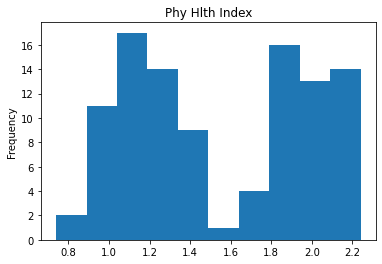

In [37]:
# lets call the histplot function and pass "AA","Phy Hlth Index" as its first arguments for group and column names
histplot("AA","Phy Hlth Index")

> As we can see the histrogram is being skewed by two large values (shows presence of outliers).Therefore, in this situation, we would like to have a better measure of central tendency. We can use either the mean or median value to fill the missing values in Physical Health Index column 

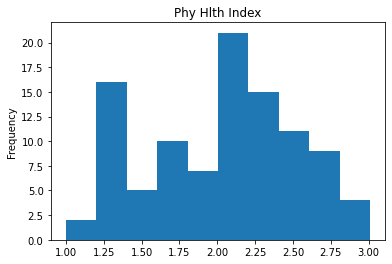

In [38]:
# lets call the histplot function and pass "Cauc","Phy Hlth Index" as its Second arguments for group and column names
histplot("Cauc","Phy Hlth Index")

> As we can see the histrogram is somewhat right skewed (but not completely). We can again use either the mean or median value to fill the missing values in Physical Health Index column 

In [39]:
# calculate the mode for "AA" Physical Health Index
category_group.get_group("AA")["Phy Hlth Index"].mode()[0]

2.12

In [40]:
# calculate the median for "AA" Physical Health Index
category_group.get_group("AA")["Phy Hlth Index"].median()

1.43

In [41]:
# calculate the mean for "AA" Physical Health Index
category_group.get_group("AA")["Phy Hlth Index"].mean()

1.553861386138614

> The mean and median for Physical Health Index in AA group is 1.554,1.43

In [42]:
# calculate the mode for "Cauc" Physical Health Index
category_group.get_group("Cauc")["Phy Hlth Index"].mode()[0]

1.39

In [43]:
# calculate the median for "Cauc" Physical Health Index
category_group.get_group("Cauc")["Phy Hlth Index"].median()

2.115

In [44]:
# calculate the mean for "Cauc" Physical Health Index
category_group.get_group("Cauc")["Phy Hlth Index"].mean()

2.0305

> The mean and median for Physical Health Index in Cauc group is 2.0305,2.115

> We see that the median and mean value is pretty close by for each of these categories. So we can just use the mean values to fill the missing values in Phy Hlth Index 

In [45]:
# fill the null values in Phy Hlth Index using the mean value of each category
df["Phy Hlth Index"]=df.groupby("Race")["Phy Hlth Index"].apply(lambda x: x.fillna(x.mean()))

In [46]:
# check to see if there are any null valuesleft after fillna() operation to our column
df["Phy Hlth Index"].info()

<class 'pandas.core.series.Series'>
Int64Index: 208 entries, 25 to 188
Series name: Phy Hlth Index
Non-Null Count  Dtype  
--------------  -----  
208 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


>Good! There are no more missing values in Phy Hlth Index column

## Section 4. Evaluation

#### Question 1:  Is race a determinant of severity of sleep apnea?

Severity of the Sleep Apnea is determined by the AHI value, the higher the AHI the severe is the case of the sleep apnea. 
The severity of Sleep Apnea can be categorised as below:

1) Mild (AHI between 5-15 per hr) \
2) Medium (AHI between 15-30 per hr) \
3) Severe (AHI > 30 per hr)

In [47]:
#Let's first find the Minimum and Maximum values of AHI amongst both the races
df.groupby(by=["Race"])["AHI"].min()

Race
AA      27.2
Cauc    13.6
Name: AHI, dtype: float64

In [48]:
df.groupby(by=["Race"])["AHI"].max()

Race
AA      91.8
Cauc    57.5
Name: AHI, dtype: float64

In [49]:
#Now lets get the counts from both the Race groups for Mild, Medium, Severe Sleep Apnea Cases
#and put them in distinct lists for printing

cc_mild=((df["Race"]=='Cauc')&(df["AHI"]<15)&(df["AHI"]>5)).value_counts().to_list()
cc_med=((df["Race"]=='Cauc')&(df["AHI"]<=30)&(df["AHI"]>15)).value_counts().to_list()
cc_severe=((df["Race"]=='Cauc')&(df["AHI"]>30)).value_counts().to_list()

aa_mild=(((df["Race"]=='AA')&(df["AHI"]<15)&(df["AHI"]>5)).value_counts()-208).to_list()
aa_med=((df["Race"]=='AA')&(df["AHI"]<=30)&(df["AHI"]>15)).value_counts().to_list()
aa_severe=((df["Race"]=='AA')&(df["AHI"]>30)).value_counts().to_list()

In [50]:
print('For the AA group, there are \
      \n {} cases of Mild Sleep Apnea, \
      \n {} cases of Medium Sleep Apnea \
      \n and {} cases of Severe Sleep Apnea \n'.format(aa_mild[0],aa_med[1],aa_severe[1]))
print('For the Cauc group, there are \
      \n {} cases of Mild Sleep Apnea, \
      \n {} cases of Medium Sleep Apnea \
      \n and {} cases of Severe Sleep Apnea '.format(cc_mild[1],cc_med[1],cc_severe[1]))

For the AA group, there are       
 0 cases of Mild Sleep Apnea,       
 2 cases of Medium Sleep Apnea       
 and 102 cases of Severe Sleep Apnea 

For the Cauc group, there are       
 1 cases of Mild Sleep Apnea,       
 43 cases of Medium Sleep Apnea       
 and 60 cases of Severe Sleep Apnea 


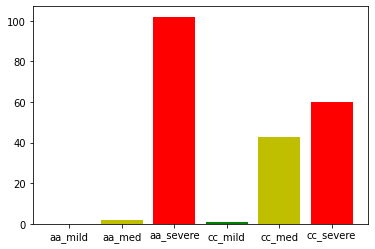

In [51]:
#Let's put these result sets in a dedicated dictionary for further use
dict_ahi = {'aa_mild': aa_mild[0], 'aa_med': aa_med[1], 'aa_severe': aa_severe[1],
            'cc_mild': cc_mild[1], 'cc_med': cc_med[1], 'cc_severe': cc_severe[1]}

#Let's display these result sets in a more presentable format using a bar chart
plt.bar(list(dict_ahi.keys()), dict_ahi.values(), color=['g','y','r'])
plt.show()

> Based on the above histogram, it can deduced that most of the participants of AA group had Severe form of Sleep Apnea (higher AHI) than the participants in the Cauc group. More than 95% of the AA participants had Severe form of Sleep Apnea.

#### Question 2:  Does race influence the presence/ magnitude of preventable and non-preventable risk factors of sleep apnea?

#### <U> Non-Preventable Factors

In [52]:
#Non-Preventable Factors 
# Let's first select the columns with values for the Non-Preventable factors for each Race Category
df[["Race","Age(Yrs)","Socio-Economic Status","Presence of HTR2A Gene","AHI","Hypertension","Education"]]

,Race,Age(Yrs),Socio-Economic Status,Presence of HTR2A Gene,AHI,Hypertension,Education
25,AA,59,Middle,Y,76.1,Y,UG
31,AA,59,Low,Y,33.7,Y,HS
80,AA,59,Low,Y,84.8,Y,HS
73,AA,57,Low,Y,82.7,Y,HS
61,AA,56,Middle,Y,37.2,Y,UG
...,...,...,...,...,...,...,...
148,Cauc,22,Middle,N,22.4,N,UG
183,Cauc,22,Middle,N,18.9,N,UG
130,Cauc,21,High,N,19.7,N,PG
132,Cauc,21,High,N,30.6,Y,UG


array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

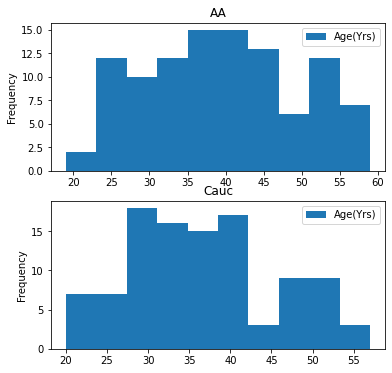

In [53]:
# Let's first pick Age(Yrs) for analysis and try to plot a graph using the existing data
df.plot.hist(column=["Age(Yrs)"],by="Race", figsize=(6,6))

> Based on the above histograms, we see that larger number of participants from African-American Race have Sleep Apnea in the Age group of 35-45 and they also had a spike in the Age group of around 50-55. Whereas for the participants from Caucasian group, majority of them have Sleep Apnea between the Age group of 27.5-42.5.

> But this doesn't give us a clear picture to post. let's dig into the numbers more and see what we find. Let's first see the max and min values in the Age column for each of the Race groups.

In [54]:
df.groupby(by=["Race"])["Age(Yrs)"].max()

Race
AA      59
Cauc    57
Name: Age(Yrs), dtype: int64

In [55]:
df.groupby(by=["Race"])["Age(Yrs)"].min()

Race
AA      19
Cauc    20
Name: Age(Yrs), dtype: int64

In [56]:
#Now lets get the counts of Sleep Apnea Cases from both the Race groups for below listed age groups
# Teens:              Under 20
# Young Adults:       Between 20-40
# Middle Age Adults:  Between 40-60
# Senior Adults:      Above 60
# and put them in distinct lists for printing

cc_teen=(((df["Race"]=='Cauc')&(df["Age(Yrs)"]<20)).value_counts()-208).to_list()
cc_adult=((df["Race"]=='Cauc')&(df["Age(Yrs)"]<40)&(df["Age(Yrs)"]>=20)).value_counts().to_list()
cc_mid_adult=((df["Race"]=='Cauc')&(df["Age(Yrs)"]<60)&(df["Age(Yrs)"]>=40)).value_counts().to_list()
cc_snr_adult=(((df["Race"]=='Cauc')&(df["Age(Yrs)"]>=60)).value_counts()-208).to_list()

aa_teen=((df["Race"]=='AA')&(df["Age(Yrs)"]<20)).value_counts().to_list()
aa_adult=((df["Race"]=='AA')&(df["Age(Yrs)"]<40)&(df["Age(Yrs)"]>=20)).value_counts().to_list()
aa_mid_adult=((df["Race"]=='AA')&(df["Age(Yrs)"]<60)&(df["Age(Yrs)"]>=40)).value_counts().to_list()
aa_snr_adult=(((df["Race"]=='AA')&(df["Age(Yrs)"]>=60)).value_counts()-208).to_list()

In [57]:
print('For the AA group, there are \
      \n {} cases of Sleep Apnea for Teens group, \
      \n {} cases of Sleep Apnea for Young Adults group \
      \n {} cases of Sleep Apnea for Middle Age Adults group \
      \n and {} cases of Sleep Apnea for Senior Adults group \n' \
      .format(aa_teen[1],aa_adult[1],aa_mid_adult[1], aa_snr_adult[0]))
print('For the Cauc group, there are \
      \n {} cases of Sleep Apnea for Teens group, \
      \n {} cases of Sleep Apnea for Young Adults group \
      \n {} cases of Sleep Apnea for Middle Age Adults group \
      \n and {} cases of Sleep Apnea for Senior Adults group ' \
      .format(cc_teen[0],cc_adult[1],cc_mid_adult[1],cc_snr_adult[0]))

For the AA group, there are       
 1 cases of Sleep Apnea for Teens group,       
 54 cases of Sleep Apnea for Young Adults group       
 49 cases of Sleep Apnea for Middle Age Adults group       
 and 0 cases of Sleep Apnea for Senior Adults group 

For the Cauc group, there are       
 0 cases of Sleep Apnea for Teens group,       
 71 cases of Sleep Apnea for Young Adults group       
 33 cases of Sleep Apnea for Middle Age Adults group       
 and 0 cases of Sleep Apnea for Senior Adults group 


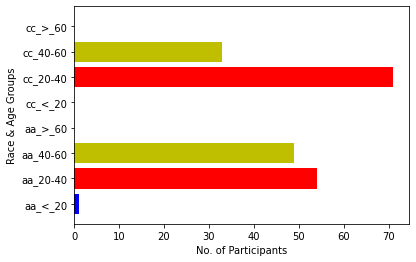

In [58]:
#Let's put these result sets in a dedicated dictionary for further use
dict_age = {'aa_<_20': aa_teen[1], 'aa_20-40': aa_adult[1], 'aa_40-60': aa_mid_adult[1],'aa_>_60':aa_snr_adult[0],
            'cc_<_20': cc_teen[0], 'cc_20-40': cc_adult[1], 'cc_40-60': cc_mid_adult[1], 'cc_>_60':cc_snr_adult[0]}

#Let's display these result sets in a more presentable format using a bar chart
fig, ax = plt.subplots()
plt.barh(list(dict_age.keys()), dict_age.values(), color=['b','r','y','g'])
ax.set_xlabel('No. of Participants')
ax.set_ylabel('Race & Age Groups')
plt.show()

> Based on the above histogram, it is evident that in both the racial groups, the larger number of participants were in the Young Adults Age group. But under the AA racial group, we see a participant who was in his Teens when diagnosed with Sleep Apnea. 
Based on the above, we could say that race and age do play a major role (if not equal) with Sleep apnea.

<AxesSubplot:xlabel='Race,Socio-Economic Status'>

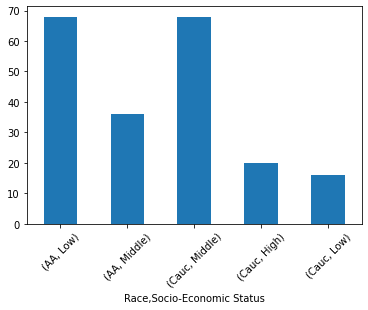

In [59]:
#Let's now pick Socio-Economic Status for analysis and try to plot a graph using the existing data
df.groupby(by="Race")["Socio-Economic Status"].value_counts().plot.bar(rot=45)

In [60]:
#Percentage of Participants in different Socio Economic Statuses under the racial groups
(df.groupby(by=["Race"])["Socio-Economic Status"].value_counts()/104)*100

Race  Socio-Economic Status
AA    Low                      65.384615
      Middle                   34.615385
Cauc  Middle                   65.384615
      High                     19.230769
      Low                      15.384615
Name: Socio-Economic Status, dtype: float64

> The above results show that the participants of AA group were only on the first two levels of the Socio Economic status, with the majority in the Low SES group. Whereas the participants of the Cauc group were on all three levels of the SES group, with the majority of them under Middle SES group.

<AxesSubplot:xlabel='Race,Presence of HTR2A Gene'>

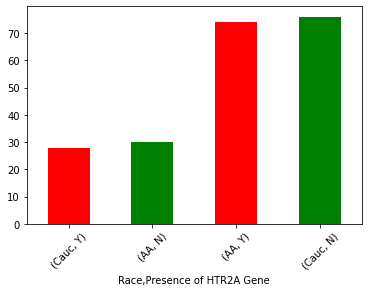

In [61]:
#Let's pick 'The Presence of the HTR2A gene' for analysis and try to plot a graph using the existing data
df.groupby(by="Race")["Presence of HTR2A Gene"].value_counts().sort_values().plot.bar(rot=45, color=['r','g'])

In [62]:
#Percentage of Participants under the racial groups having/not having the HTR2A gene
(df.groupby(by="Race")["Presence of HTR2A Gene"].value_counts()/104)*100

Race  Presence of HTR2A Gene
AA    Y                         71.153846
      N                         28.846154
Cauc  N                         73.076923
      Y                         26.923077
Name: Presence of HTR2A Gene, dtype: float64

> The above two result sets again show that the participants from the AA group were more likely to have the Presence of HTR2A Gene(OSA Associated - Seratonin receptor encoding Gene) in them. They had a huge contrast in their numbers when compared with their Cauc counterparts in the study. 
About 71.1% of the AA participants were found with HTR2A gene as compared to 26.9% of the Cauc participants.

<AxesSubplot:xlabel='Race,Hypertension'>

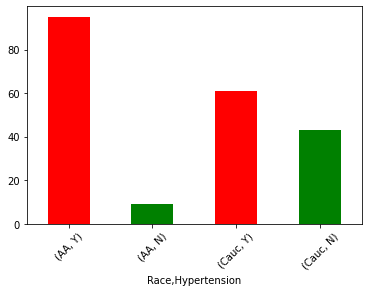

In [63]:
# Next for analysis Let's pick 'Hypertension' and try to plot a graph using the existing data
df.groupby(by="Race")["Hypertension"].value_counts().plot.bar(rot=45, color=['r','g'])

In [64]:
#Percentage of Participants under the racial groups being/not-being Hypertensive
(df.groupby(by="Race")["Hypertension"].value_counts()/104)*100

Race  Hypertension
AA    Y               91.346154
      N                8.653846
Cauc  Y               58.653846
      N               41.346154
Name: Hypertension, dtype: float64

>AA participants were also the ones with higher numbers of Hypertensive cases, amongst the two racial groups.

#### <U>Preventable Factors

In [65]:
#Lets pick the columns with values for the Preventable factors for each Race Category
df[["Race","BMI","Obesity","Type of Meals","Exercise Dur(Mins/day)","Lifestyle","Education",
    "Phy Hlth Index","Avg CPAP Use(hrs/night)"]]

,Race,BMI,Obesity,Type of Meals,Exercise Dur(Mins/day),Lifestyle,Education,Phy Hlth Index,Avg CPAP Use(hrs/night)
25,AA,35.4,Y,Fresh,30.0,Active,UG,0.87,4.55
31,AA,30.4,Y,Packed,25.3,Sedentary,HS,1.42,3.42
80,AA,34.8,Y,Packed,21.9,Sedentary,HS,1.23,3.40
73,AA,28.4,N,Packed,21.7,Sedentary,HS,0.99,3.26
61,AA,32.4,Y,Packed,15.2,Sedentary,UG,1.05,3.54
...,...,...,...,...,...,...,...,...,...
148,Cauc,25.4,N,Packed,19.0,Sedentary,UG,1.26,6.03
183,Cauc,26.0,N,Packed,15.6,Sedentary,UG,1.31,5.69
130,Cauc,29.0,N,Fresh,44.0,Active,PG,1.36,5.84
132,Cauc,31.7,Y,Fresh,45.0,Active,UG,2.47,6.08


 Let's first find the max and min values of BMIs in both the racial groups, to see what all BMI categories do they fall under.

In [66]:
df.groupby(by="Race")["BMI"].max()

Race
AA      40.6
Cauc    39.0
Name: BMI, dtype: float64

In [67]:
df.groupby(by="Race")["BMI"].min()

Race
AA      21.0
Cauc    22.5
Name: BMI, dtype: float64

In [68]:
# Now lets get the counts from both the Race groups for Normal(19-24), Over(25-29), Obese(30-39), 
# Extremely-Obese(>=40) BMI categories and put them in distinct lists for printing

cc_normal=((df["Race"]=='Cauc')&(df["BMI"]<25)&(df["BMI"]>=19)).value_counts().to_list()
cc_over=((df["Race"]=='Cauc')&(df["BMI"]<30)&(df["BMI"]>=25)).value_counts().to_list()
cc_obese=((df["Race"]=='Cauc')&(df["BMI"]<40)&(df["BMI"]>=30)).value_counts().to_list()
cc_ex_obese=(((df["Race"]=='Cauc')&(df["BMI"]>=40)).value_counts()-208).to_list()

aa_normal=(((df["Race"]=='AA')&(df["BMI"]<25)&(df["BMI"]>=19)).value_counts()).to_list()
aa_over=((df["Race"]=='AA')&(df["BMI"]<30)&(df["BMI"]>=25)).value_counts().to_list()
aa_obese=((df["Race"]=='AA')&(df["BMI"]<40)&(df["BMI"]>=30)).value_counts().to_list()
aa_ex_obese=((df["Race"]=='AA')&(df["BMI"]>=40)).value_counts().to_list()

In [69]:
print('For the AA group, there are \
      \n {} cases of Sleep Apnea with Normal BMI, \
      \n {} cases of Sleep Apnea with Overweight BMI \
      \n {} cases of Sleep Apnea with Obese BMI \
      \n and {} cases of Sleep Apnea with Extremely Obese BMI \n' \
      .format(aa_normal[1],aa_over[1],aa_obese[1],aa_ex_obese[1]))
print('For the Cauc group, there are \
      \n {} cases of Sleep Apnea with Normal BMI, \
      \n {} cases of Sleep Apnea with Overweight BMI \
      \n {} cases of Sleep Apnea with Obese BMI \
      \n and {} cases of Sleep Apnea with Extremely Obese BMI ' \
      .format(cc_normal[1],cc_over[1],cc_obese[1],cc_ex_obese[0]))

For the AA group, there are       
 8 cases of Sleep Apnea with Normal BMI,       
 33 cases of Sleep Apnea with Overweight BMI       
 62 cases of Sleep Apnea with Obese BMI       
 and 1 cases of Sleep Apnea with Extremely Obese BMI 

For the Cauc group, there are       
 5 cases of Sleep Apnea with Normal BMI,       
 41 cases of Sleep Apnea with Overweight BMI       
 58 cases of Sleep Apnea with Obese BMI       
 and 0 cases of Sleep Apnea with Extremely Obese BMI 


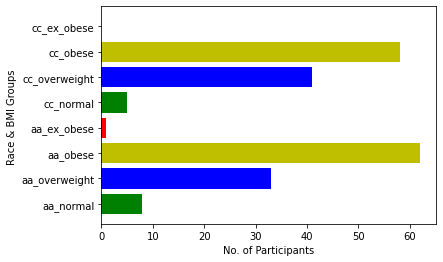

In [70]:
#Let's put these result sets in a dedicated dictionary for further use
dict_bmi = {'aa_normal': aa_normal[1], 'aa_overweight': aa_over[1], 
            'aa_obese': aa_obese[1], 'aa_ex_obese': aa_ex_obese[1],
            'cc_normal': cc_normal[1], 'cc_overweight': cc_over[1],
            'cc_obese': cc_obese[1], 'cc_ex_obese': cc_ex_obese[0]}

# Now Let's display these result sets in a more presentable format using a bar chart
fig, ax = plt.subplots()
plt.barh(list(dict_bmi.keys()), dict_bmi.values(), color=['g','b','y','r'])
ax.set_xlabel('No. of Participants')
ax.set_ylabel('Race & BMI Groups ')
plt.show()

> Based on the above histogram plot, one could say that the larger number of participants from the Caucasian group have highe BMIS than their AA counterparts. 

> But on comparing the actual numbers, we see that about 60% of the AA participants fall under the Obese and Morbidly Obese groups; where as only 55% of the Cauc participants fall under Obese group. This is clearly confirmed in the next two code cells, where we are analyzing the Obesity column for each racial group.

In [71]:
# Percentage of Participants under the racial groups having/not-having obesity as a condition
(df.groupby(by="Race")["Obesity"].value_counts()/104)*100

Race  Obesity
AA    Y          59.615385
      N          40.384615
Cauc  Y          55.769231
      N          44.230769
Name: Obesity, dtype: float64

<AxesSubplot:xlabel='Race,Obesity'>

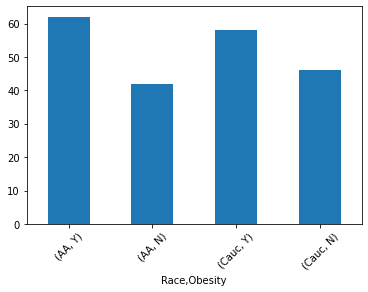

In [72]:
# Let's pick 'Obesity' and picture the above results by plotting a graph using the existing data
df.groupby(by="Race")["Obesity"].value_counts().plot.bar(rot=45)

In [73]:
# Percentage of Participants under the racial groups with different Types of Meal choices
(df.groupby(by=["Race"])["Type of Meals"].value_counts()/104)*100

Race  Type of Meals
AA    Packed           71.153846
      Fresh            28.846154
Cauc  Fresh            53.846154
      Packed           46.153846
Name: Type of Meals, dtype: float64

<AxesSubplot:xlabel='Race,Type of Meals'>

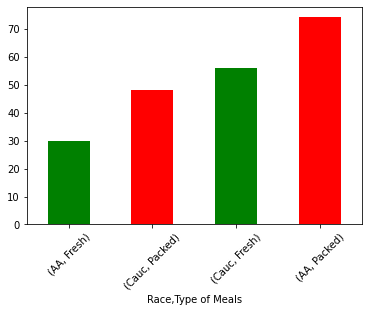

In [74]:
# Let's pick 'Type Of Meals' and see the above numbers by plotting a graph using the existing data
df.groupby(by=["Race"])["Type of Meals"].value_counts().sort_values().plot.bar(rot=45, color=['g','r'])

> With above calculations and graphical representation, we could see that about 71% of the AA participants ate packed meals, whereas more than 50% of the Cauc participants had Fresh meals by choice.

In [75]:
# Average Exercise Durations in Mins/Day of Participants under the racial groups
df.groupby(by=["Race"])["Exercise Dur(Mins/day)"].sum()/104

Race
AA      27.921538
Cauc    36.644231
Name: Exercise Dur(Mins/day), dtype: float64

In [76]:
# Percentage of Participants under the racial groups with different Lifestyle choices
(df.groupby(by="Race")["Lifestyle"].value_counts()/104)*100

Race  Lifestyle
AA    Sedentary    63.461538
      Active       36.538462
Cauc  Active       57.692308
      Sedentary    42.307692
Name: Lifestyle, dtype: float64

<AxesSubplot:xlabel='Race,Lifestyle'>

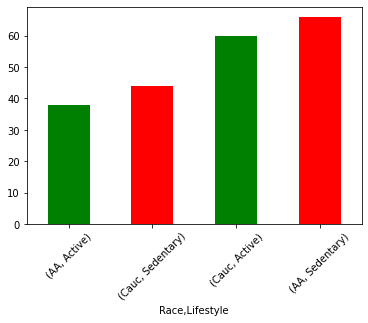

In [77]:
# Let's pick 'Lifestyle' and see the above numbers by plotting a graph using the existing data
df.groupby(by="Race")["Lifestyle"].value_counts().sort_values().plot.bar(rot=45, color=['g','r'])

> Based on the above analysis, we could see that more partipants of Caucasian decent spent more amount of time exercising/day on an average as compared to AA participants. Also the partipants from Cauc group had a more active lifestyle than their AA counterparts. About more than 57% of the Cauc participants had Active lifestyle, whereas only 36.5% of the AA participants followed the same.

In [78]:
# Average Physical Health Index of Participants under the racial groups
df.groupby(by=["Race"])["Phy Hlth Index"].sum()/104

Race
AA      1.553861
Cauc    2.030500
Name: Phy Hlth Index, dtype: float64

> Again based on the previous analysis of type of meals, lifestyles, exercise duration/day: it was quite obvious that the average Physical health index of the AA participants would be lower than that of their Cauc counterparts. This is proven by numbers in the above code cell.

In [79]:
# Number of Participants under the racial groups in the three Education class groups
df.groupby(by="Race")["Education"].value_counts()

Race  Education
AA    HS           64
      UG           40
Cauc  UG           44
      HS           40
      PG           20
Name: Education, dtype: int64

<AxesSubplot:xlabel='Race,Education'>

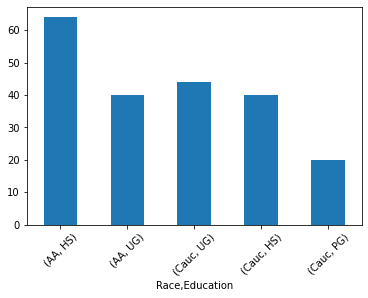

In [80]:
# Let's pick 'Education' and see the above numbers by plotting a graph using the existing data
df.groupby(by="Race")["Education"].value_counts().plot.bar(rot=45)

Education in my opinion is something that could be treated both ways as Preventable Factor and/or Non-Preventable Factor. So, I would leave it to you to decide.

But clearly we can see the higher number of AA participants have High School as their highest form of education, whereas the Cauc particpants were majorly Under Graduates and nearly about 20% were Post Graduates as well. 

#### Question 3:  Is sleep apnea manageable? Do any racial disparities exist for sleep apnea treatment and outcomes?

> To answer this question we need to analyze the dataset for the Quality of Sleep, participants from both the Race had, again what was their Avg use of CPAP device, and how well they were able to reduce the most common symptoms of Sleep Apnea.

In [81]:
# Let's check the average of number of hours of CPAP Use(hrs/night) for both racial groups
df.groupby(by="Race")["Avg CPAP Use(hrs/night)"].sum()/104

Race
AA      4.130481
Cauc    5.729423
Name: Avg CPAP Use(hrs/night), dtype: float64

In [82]:
# Similarly Let's check the average of quality of sleep the participants had in both racial groups"Percent NREM Sleep"
df.groupby(by="Race")["Percent NREM Sleep"].sum()/104

Race
AA      0.781250
Cauc    0.878462
Name: Percent NREM Sleep, dtype: float64

> The Above two sets of results show that among the two Race groups participants, Caucasians had better quality sleep than the participants of AA group. Which upon comparing their number of hours/night use of CPAP device, show that Cauc group participants had higher values than the AA group. This could help us clearly predict the fact that OSA could be cured/controlled by longer use of CPAP device.

> Now lets check the reviews for the changes/reductions in different symptoms of the Sleep Apnea in both racial groups.

<AxesSubplot:xlabel='Race,Reduced Snoring-Post 12wks CPAP Use'>

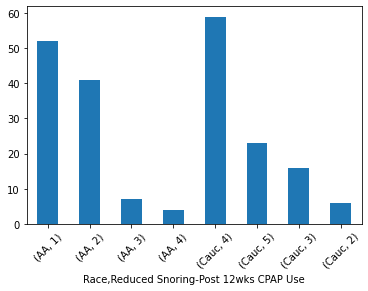

In [83]:
df.groupby(by="Race")["Reduced Snoring-Post 12wks CPAP Use"].value_counts().plot.bar(rot=45)

<AxesSubplot:xlabel='Race,Reduced Tiredness-Post 12wks CPAP Use'>

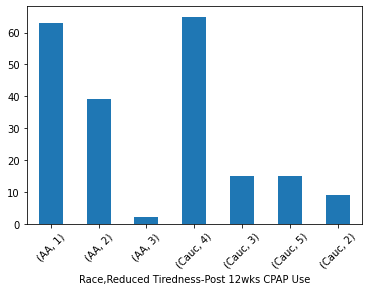

In [84]:
df.groupby(by="Race")["Reduced Tiredness-Post 12wks CPAP Use"].value_counts().plot.bar(rot=45)

<AxesSubplot:xlabel='Race,Reduced Daytime Sleepiness-Post 12wks CPAP Use'>

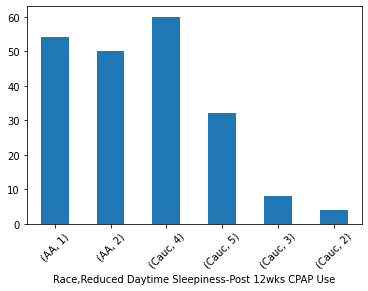

In [85]:
df.groupby(by="Race")["Reduced Daytime Sleepiness-Post 12wks CPAP Use"].value_counts().plot.bar(rot=45)

> Finally the Above sets of Histograms show that among the two Race groups participants, Caucasians had better responses than the participants of AA group, for all the syptoms of Sleep Apnea. Which again can be directly related to the number of hours/night use of CPAP device among the two groups. The histograms clearly show that Cauc group participants had higher values than the AA group, since their reponses on the Likert Scale were always higher for feeling better Post 12 weeks CPAP use review. This could help us clearly answer the question, that OSA could be cured or at the least controlled by longer use of CPAP device.

In [86]:
#Now lets get the counts from both the Race groups for Mild, Medium, Severe Sleep Apnea Cases
#and put them in distinct lists for printing for both Pre and Post 12 weeks CPAP Use

cc_mild=((df["Race"]=='Cauc')&(df["AHI"]<15)&(df["AHI"]>5)).value_counts().to_list()
cc_med=((df["Race"]=='Cauc')&(df["AHI"]<=30)&(df["AHI"]>15)).value_counts().to_list()
cc_severe=((df["Race"]=='Cauc')&(df["AHI"]>30)).value_counts().to_list()

aa_mild=(((df["Race"]=='AA')&(df["AHI"]<15)&(df["AHI"]>5)).value_counts()-208).to_list()
aa_med=((df["Race"]=='AA')&(df["AHI"]<=30)&(df["AHI"]>15)).value_counts().to_list()
aa_severe=((df["Race"]=='AA')&(df["AHI"]>30)).value_counts().to_list()

cc_mild_post=((df["Race"]=='Cauc')&(df["AHI-Post 12wks CPAP Use"]<15)&(df["AHI-Post 12wks CPAP Use"]>5)
             ).value_counts().to_list()
cc_med_post=((df["Race"]=='Cauc')&(df["AHI-Post 12wks CPAP Use"]<=30)&(df["AHI-Post 12wks CPAP Use"]>15)
            ).value_counts().to_list()
cc_severe_post=((df["Race"]=='Cauc')&(df["AHI-Post 12wks CPAP Use"]>30)).value_counts().to_list()

aa_mild_post=(((df["Race"]=='AA')&(df["AHI-Post 12wks CPAP Use"]<15)&(df["AHI-Post 12wks CPAP Use"]>5)
              ).value_counts()-208).to_list()
aa_med_post=((df["Race"]=='AA')&(df["AHI-Post 12wks CPAP Use"]<=30)&(df["AHI-Post 12wks CPAP Use"]>15)
            ).value_counts().to_list()
aa_severe_post=((df["Race"]=='AA')&(df["AHI-Post 12wks CPAP Use"]>30)).value_counts().to_list()

In [87]:
print('Before 12 week CPAP use, For the AA group, there are \
      \n {} cases of Mild Sleep Apnea, \
      \n {} cases of Medium Sleep Apnea \
      \n and {} cases of Severe Sleep Apnea \n'.format(aa_mild[0],aa_med[1],aa_severe[1]))
print('Before 12 week CPAP use, For the Cauc group, there are \
      \n {} cases of Mild Sleep Apnea, \
      \n {} cases of Medium Sleep Apnea \
      \n and {} cases of Severe Sleep Apnea '.format(cc_mild[1],cc_med[1],cc_severe[1]))
print('Post 12 week CPAP use, For the AA group, there are \
      \n {} cases of Mild Sleep Apnea, \
      \n {} cases of Medium Sleep Apnea \
      \n and {} cases of Severe Sleep Apnea \n'.format(aa_mild_post[0],aa_med_post[1],aa_severe_post[1]))
print('Post 12 week CPAP use, For the Cauc group, there are \
      \n {} cases of Mild Sleep Apnea, \
      \n {} cases of Medium Sleep Apnea \
      \n and {} cases of Severe Sleep Apnea '.format(cc_mild_post[1],cc_med_post[1],cc_severe_post[1]))

Before 12 week CPAP use, For the AA group, there are       
 0 cases of Mild Sleep Apnea,       
 2 cases of Medium Sleep Apnea       
 and 102 cases of Severe Sleep Apnea 

Before 12 week CPAP use, For the Cauc group, there are       
 1 cases of Mild Sleep Apnea,       
 43 cases of Medium Sleep Apnea       
 and 60 cases of Severe Sleep Apnea 
Post 12 week CPAP use, For the AA group, there are       
 0 cases of Mild Sleep Apnea,       
 5 cases of Medium Sleep Apnea       
 and 99 cases of Severe Sleep Apnea 

Post 12 week CPAP use, For the Cauc group, there are       
 20 cases of Mild Sleep Apnea,       
 58 cases of Medium Sleep Apnea       
 and 25 cases of Severe Sleep Apnea 


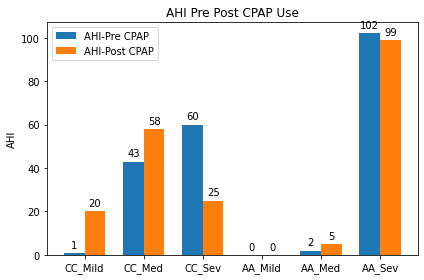

In [88]:
# Let's try to plot the above findings into a bar graph to see 
# how much of the difference in AHI did the CPAP use make for each type of racial groups

labels = ['CC_Mild', 'CC_Med', 'CC_Sev', 'AA_Mild', 'AA_Med', 'AA_Sev']
pre_ahi = [cc_mild[1], cc_med[1],cc_severe[1], aa_mild[0],aa_med[1],aa_severe[1]]
post_ahi = [cc_mild_post[1],cc_med_post[1],cc_severe_post[1], aa_mild_post[0],aa_med_post[1],aa_severe_post[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pre_ahi, width, label='AHI-Pre CPAP')
rects2 = ax.bar(x + width/2, post_ahi, width, label='AHI-Post CPAP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AHI')
ax.set_title('AHI Pre Post CPAP Use')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [89]:
#Let's Calculate the Average AHI for both the racial groups for Pre and Post CPAP use.

pre_ahi=(df.groupby(by="Race")["AHI"].sum()/104).to_list()
post_ahi=(df.groupby(by="Race")["AHI-Post 12wks CPAP Use"].sum()/104).to_list()

In [90]:
pre_ahi

[53.026923076923076, 33.57692307692308]

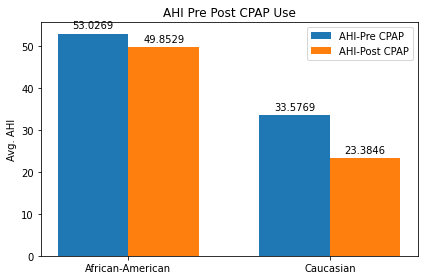

<AxesSubplot:xlabel='Race'>

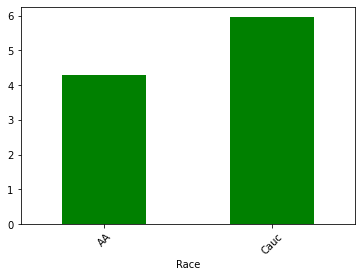

In [91]:
# Let's try to plot the above findings into a bar graph to see 
# the difference in the Average AHI did the CPAP use make for each type of racial groups

labels = ['African-American', 'Caucasian']
pre_ahi = [pre_ahi[0], pre_ahi[1]]
post_ahi = [post_ahi[0],post_ahi[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pre_ahi, width, label='AHI-Pre CPAP')
rects2 = ax.bar(x + width/2, post_ahi, width, label='AHI-Post CPAP')

# Lets set the X label and Y label and add the legend and try to put as much details as we can.
ax.set_ylabel('Avg. AHI')
ax.set_title('AHI Pre Post CPAP Use')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

#And just to show the difference in the Average CPAP use between the two racial groups
(df.groupby(by="Race")["Avg CPAP Use(hrs/night)"].sum()/100).plot.bar(rot=45, color='g')

> As a final visualization for the entire data set comparisons for the Pre and Post 12 weeks AHI values, we can see that for sure there is some reduction in the AHI values post proper and regular use of CPAP devices.